# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Moses Koroma

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

## Question 1

This code fetches the HTML content of an archived article, extracts the main `<article>` tag using BeautifulSoup, and saves the result as a `.html` file.


In [13]:
import requests
from bs4 import BeautifulSoup

# 1. Define the archived URL of the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# 2. Send a GET request
response = requests.get(url)

# 3. Parse the page content using BeautifulSoup and html5lib parser
soup = BeautifulSoup(response.content, 'html5lib')

# 4. Find the main article tag
article = soup.find('article')

# 5. Save the article HTML as a plain .html file
with open("article.html", "w", encoding="utf-8") as f:
    f.write(str(article))

print("Article HTML has been saved to article.html")


Article HTML has been saved to article.html


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [14]:
from bs4 import BeautifulSoup

# Step 1: Read in the saved HTML file from Question 1
with open("article.html", "r", encoding="utf-8") as f:
    html = f.read()

# Step 2: Parse the HTML
soup = BeautifulSoup(html, 'html5lib')

# Step 3: Print the raw text content using .get_text()
print(soup.get_text())



    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [15]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter

# Load the article HTML
with open("article.html", "r", encoding="utf-8") as f:
    html = f.read()

# Parse the HTML
soup = BeautifulSoup(html, "html5lib")
text = soup.get_text()

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Filter and count tokens
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
counts = Counter(tokens)
top5 = counts.most_common(5)

# Print results
print("Top 5 most frequent tokens:")
for word, freq in top5:
    print(f"{word}: {freq}")


Top 5 most frequent tokens:
laser: 35
headlights: 19
headlight: 11
technology: 10
led: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [16]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter

# Load the article HTML
with open("article.html", "r", encoding="utf-8") as f:
    html = f.read()

# Parse the HTML and get plain text
soup = BeautifulSoup(html, "html5lib")
text = soup.get_text()

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Get cleaned lemmas (not stopwords, not punctuation, not whitespace)
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count lemma frequency
lemma_counts = Counter(lemmas)
top5_lemmas = lemma_counts.most_common(5)

# Print results
print("Top 5 most frequent lemmas:")
for lemma, freq in top5_lemmas:
    print(f"{lemma}: {freq}")


Top 5 most frequent lemmas:
laser: 40
headlight: 28
beam: 12
technology: 10
led: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [17]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter

# Load the HTML and extract plain text
with open("article.html", "r", encoding="utf-8") as f:
    html = f.read()

soup = BeautifulSoup(html, "html5lib")
text = soup.get_text()

# Load spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Get sentences from the doc
sentences = list(doc.sents)
first_sentence = sentences[0]

# Recalculate frequent tokens and lemmas for reuse
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
token_counts = Counter(tokens)
top_tokens = [token for token, _ in token_counts.most_common(5)]

lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
lemma_counts = Counter(lemmas)
top_lemmas = [lemma for lemma, _ in lemma_counts.most_common(5)]

# Define scoring by token
def score_sentence_by_token(sentence, interesting_tokens):
    words = [token.text.lower() for token in sentence if not token.is_punct and not token.is_space]
    if len(words) == 0:
        return 0
    match_count = sum(1 for word in words if word in interesting_tokens)
    return match_count / len(words)

# Define scoring by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct and not token.is_space]
    if len(lemmas) == 0:
        return 0
    match_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return match_count / len(lemmas)

# Test both on the first sentence
print("First sentence:", first_sentence.text.strip())
print("Score by token:", score_sentence_by_token(first_sentence, top_tokens))
print("Score by lemma:", score_sentence_by_lemma(first_sentence, top_lemmas))


First sentence: How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Score by token: 0.12121212121212122
Score by lemma: 0.09090909090909091


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

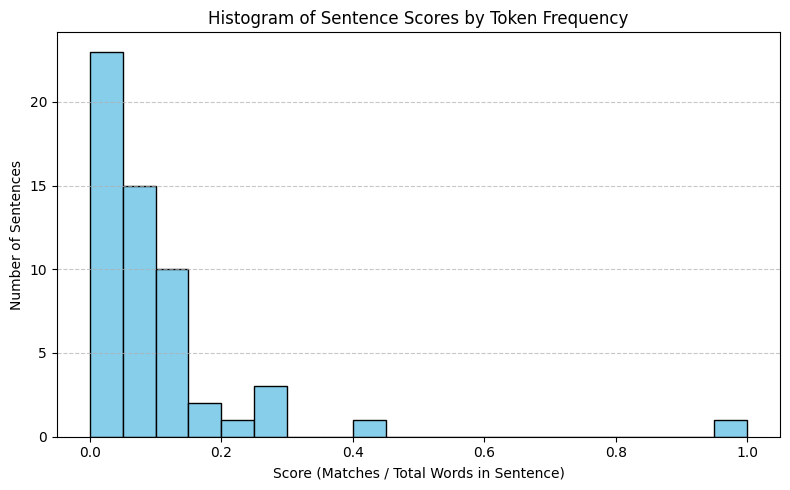

In [19]:
import matplotlib.pyplot as plt

# Score each sentence using the token-based scoring function
token_scores = [score_sentence_by_token(sent, top_tokens) for sent in sentences]

# Plot a histogram of the scores
plt.figure(figsize=(8, 5))
plt.hist(token_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Sentence Scores by Token Frequency")
plt.xlabel("Score (Matches / Total Words in Sentence)")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).